# Dimensionality Reduction with Images

Author: George H. Chen (georgechen [at symbol] cmu.edu)

We start with some usual boilerplate code:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np

## Loading in a handwritten digit dataset

In [2]:
from keras.datasets import mnist

images = mnist.load_data()[0][0]

flattened_images = images.reshape(len(images), -1)  # flattens out each training image
feature_vectors = flattened_images.astype(np.float32) / 255  # rescale to be between 0 and 1

# we will work with a subsample of the data
np.random.seed(0)
random_sample = np.random.permutation(len(feature_vectors))[:10000]  # 10000 random indices

Using TensorFlow backend.


In [3]:
feature_vectors.shape

(60000, 784)

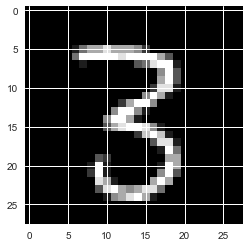

In [4]:
# you can re-run this to see random digits
plt.imshow(feature_vectors[np.random.randint(len(feature_vectors))].reshape(28, 28), cmap='gray')

## Dimensionality reduction with PCA

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # project data down to 2 dimensions
feature_vectors_pca2d = pca.fit_transform(feature_vectors[random_sample])

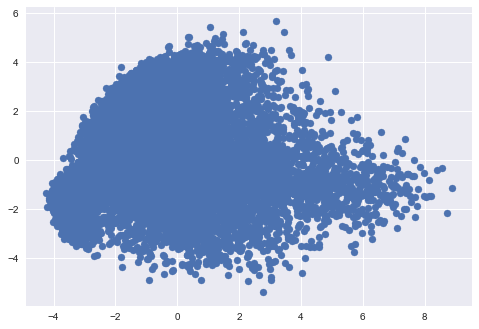

In [11]:
plt.scatter(feature_vectors_pca2d[:, 0], feature_vectors_pca2d[:, 1])

In [12]:
pca.explained_variance_ratio_

array([0.09845051, 0.07117977], dtype=float32)

## Dimensionality reduction with t-SNE

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=5000)
feature_vectors_tsne2d = tsne.fit_transform(feature_vectors[random_sample])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.648s...
[t-SNE] Computed neighbors for 10000 samples in 139.436s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.123683
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.630470
[t-SNE] KL divergence after 5000 iterations: 1.704010


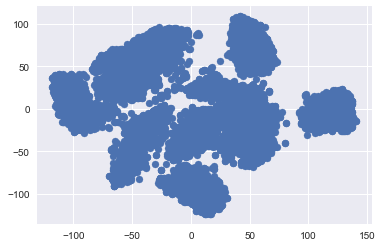

In [9]:
plt.scatter(feature_vectors_tsne2d[:, 0], feature_vectors_tsne2d[:, 1])

In [10]:
labels = mnist.load_data()[0][1]

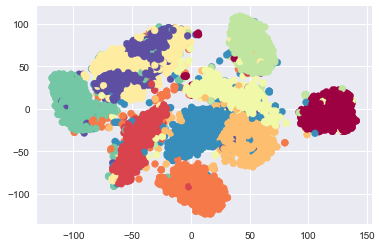

In [11]:
# here we color each low-dimensional t-SNE point differently depending on its true known label for what digit the point corresponds to
# (in many applications we do not have this sort of label information!)
plt.scatter(feature_vectors_tsne2d[:, 0], feature_vectors_tsne2d[:, 1], c=[str(i) for i in labels[random_sample]], cmap='Spectral')

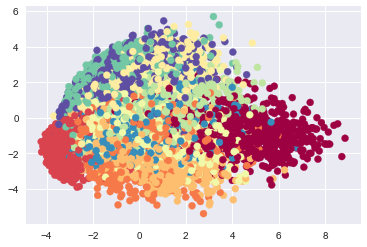

In [12]:
# coloring the points by true digit label, now for PCA
plt.scatter(feature_vectors_pca2d[:, 0], feature_vectors_pca2d[:, 1], c=[str(i) for i in labels[random_sample]], cmap='Spectral')